# INE
> 

In [2]:
from mexican_polarization.Loader import Loader
from mexican_polarization.Analyzer import Analyzer
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
ine_csv = '/Users/gerardoguerrero/mexican-polarization/nbs/datalake/2024-01-11-11-05-54-CST-Historical-Report-Medios-Anti-4T-INE-2018-01-01--2024-01-01.csv'

In [5]:
loader = Loader(csv = ine_csv, virtue_dict = "virtue2.txt", vice_dict= "vice2.txt")
#loader.eliminate_word("suprema","virtue")

In [6]:
loader.process_csv(text_cols=['Page Name', 'Message'], num_cols=['Total Interactions'], date_cols=['Post Created'])

In [7]:
df = loader.processed
df

,Page Name,Message,Total Interactions,Post Created
0,latinus,ine ordena a sheinbaum retirar de sus redes so...,687.0,2023-12-30 22:18:15 CST
1,radio formula,aguas xochitl morena alista la queja que prese...,128.0,2023-12-30 14:15:39 CST
2,milenio,no lo dejes para el ultimo momento,1.0,2023-12-29 09:13:08 CST
3,radio formula,lomasvistode2023 es una aberracion del ine y e...,61.0,2023-12-29 04:00:29 CST
4,milenio,conservaran la antiguedad adquirida al momento...,0.0,2023-12-28 04:00:49 CST
...,...,...,...,...
8534,radio formula,el recorte presupuestal de 950 millones de pes...,68.0,2019-01-29 17:50:00 CST
8535,milenio,ultimahora esto aunque el ministro admitio con...,169.0,2019-01-29 11:03:08 CST
8536,radio formula,el instituto asegura que necesita mas recursos...,52.0,2019-01-22 19:05:00 CST
8537,milenio,y si sera con felipe calderon,NaN,2019-01-21 16:16:56 CST


In [8]:
analyzer = Analyzer(loader)

In [10]:
df = analyzer.moral_words_count('Message')

In [21]:
df2 = analyzer.get_moral_df(df)

/Users/gerardoguerrero/anaconda3/lib/python3.10/site-packages/mexican_polarization/Analyzer.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moral['VVRate'] = df.apply(lambda row: (row['Virtue words count'] + row['Vice words count']) / row['Total words'], axis=1)
/Users/gerardoguerrero/anaconda3/lib/python3.10/site-packages/mexican_polarization/Analyzer.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moral['Vice Rate'] = df.apply(lambda row: row['Vice words count'] / row['Total words'], axis=

In [18]:
df_vice = df2[df2['Category'] == 'Vice']
df_vice.sort_values(by=['Total Interactions'], ascending=False, inplace=True)
df_vice2 = df_vice[['Page Name','Original Message','Total Interactions','Post Created','VVRate','Vice Rate','Virtue Rate','Category']]
df_vice2 = df_vice2.drop_duplicates(subset='Original Message', keep='first')
df_vice2.dropna(subset=['Total Interactions'], inplace=True)
df_vice2

/var/folders/hx/2yrhw82s29g3zhsqchyrqcy80000gn/T/ipykernel_24304/2361054070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vice.sort_values(by=['Total Interactions'], ascending=False, inplace=True)


,Page Name,Original Message,Total Interactions,Post Created,VVRate,Vice Rate,Virtue Rate,Category
6437,reformacom,"#Opinión Al querer desaparecer al INE, AMLO am...",997.0,2021-06-07 08:15:03 CDT,0.04,0.04,0.0,Vice
7636,radio formula,La jefa de Gobierno no está a favor de las pet...,996.0,2021-01-12 22:15:01 CST,0.08,0.08,0.0,Vice
1090,milenio,"VIDEO | ""A quién se le ocurre, ya está grandec...",990.0,2023-06-25 13:58:29 CDT,0.11,0.11,0.0,Vice
5991,reformacom,INE afirmó que una reforma electoral demostrar...,987.0,2021-08-20 07:00:32 CDT,0.04,0.04,0.0,Vice
6678,latinus,#Elección2021. Fiscalía decidirá si entrega de...,986.0,2021-05-13 08:58:29 CDT,0.10,0.10,0.0,Vice
...,...,...,...,...,...,...,...,...
280,milenio,La consejera del INE lamentó los hechos ocurri...,1.0,2023-10-27 01:38:39 CDT,0.12,0.12,0.0,Vice
157,milenio,Los consejeros electorales advierten que la in...,0.0,2023-11-25 09:53:20 CST,0.06,0.06,0.0,Vice
2077,milenio,El Comité Técnico de Evaluación desechó la can...,0.0,2023-03-04 12:55:15 CST,0.04,0.04,0.0,Vice
3822,milenio,La Segunda Sala de la SCJN declaró fundados lo...,0.0,2022-10-27 05:28:25 CDT,0.06,0.06,0.0,Vice


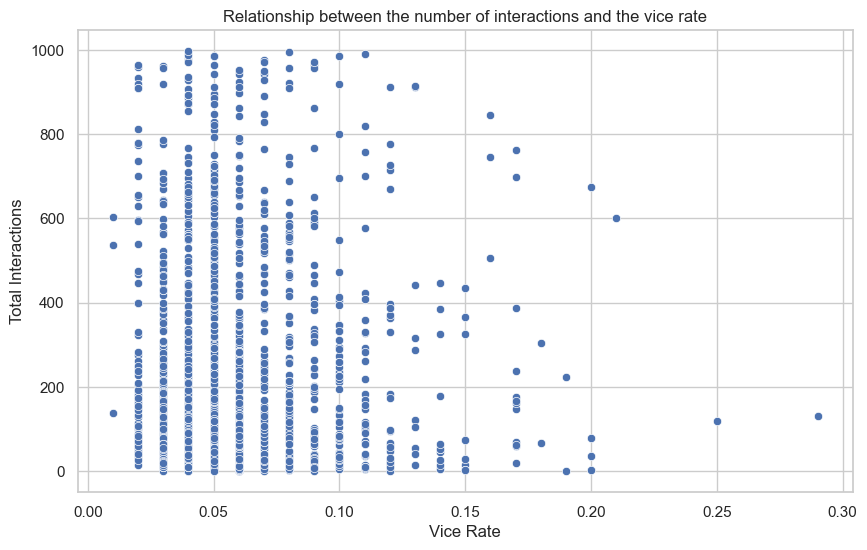

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Vice Rate", y="Total Interactions", data=df_vice2)
plt.title('Relationship between the number of interactions and the vice rate')
plt.show()

In [19]:
df_virtue = df2[df2['Category'] == 'Virtue']
df_virtue.sort_values(by=['Virtue Rate'], ascending=False, inplace=True)
df_virtue2 = df_virtue[['Page Name','Original Message','Total Interactions','Post Created','VVRate','Vice Rate','Virtue Rate','Category']]
df_virte2 = df_virtue2.drop_duplicates(subset='Original Message', keep='first')
df_virtue2

/var/folders/hx/2yrhw82s29g3zhsqchyrqcy80000gn/T/ipykernel_24304/1651821020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virtue.sort_values(by=['Virtue Rate'], ascending=False, inplace=True)


,Page Name,Original Message,Total Interactions,Post Created,VVRate,Vice Rate,Virtue Rate,Category
6099,milenio,"""Así, ¡que viva la democracia selectiva!"".",NaN,2021-08-01 12:25:22 CDT,0.33,0.00,0.33,Virtue
8456,milenio,Los gobernantes antes de tener derecho tienen ...,253.0,2019-08-23 03:41:00 CDT,0.33,0.00,0.33,Virtue
1796,milenio,"El consejero Ciro Murayama apuntó que ""México ...",25.0,2023-03-25 00:24:19 CST,0.25,0.00,0.25,Virtue
6006,milenio,Córdova sostuvo que la equidad es la premisa d...,27.0,2021-08-18 00:06:40 CDT,0.23,0.00,0.23,Virtue
7325,milenio,“Vamos a tener actos de resistencia civil pací...,865.0,2021-03-31 00:00:34 CST,0.23,0.00,0.23,Virtue
...,...,...,...,...,...,...,...,...
2385,milenio,Los asistentes a la protesta a favor del #INE ...,NaN,2023-02-26 10:40:09 CST,0.03,0.01,0.01,Virtue
211,radio formula,El mejor regalo para AMLO... ¡y fue de Ebrard!...,NaN,2023-11-13 17:48:01 CST,0.03,0.01,0.01,Virtue
167,radio formula,¡Justo en la cartera! 🤑Se agota el tiempo para...,306.0,2023-11-23 20:45:01 CST,0.03,0.01,0.01,Virtue
627,radio formula,¡Qué mala memoria tienen! 🤨 Una propuesta de d...,26.0,2023-08-18 14:30:00 CDT,0.03,0.01,0.01,Virtue


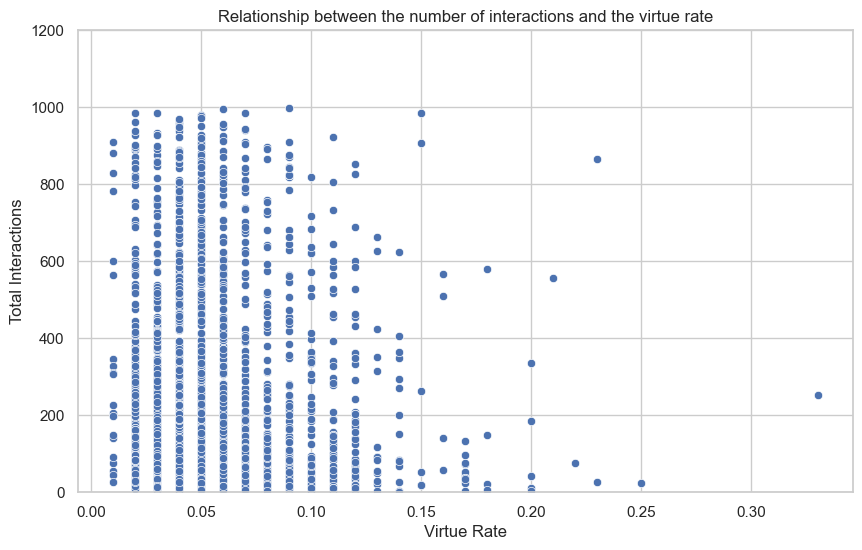

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Virtue Rate", y="Total Interactions", data=df_virtue2)
plt.ylim(0, 1200)
plt.title('Relationship between the number of interactions and the virtue rate')
plt.show()